<a href="https://colab.research.google.com/github/rdgdelfino/MVP_DataEngineering/blob/main/BrazilianCities_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RELATÓRIO - BRAZILIAN CITIES ANALYSIS**

## **1. Objetivo**

Entender como o nível de desenvolvimento das cidades brasileiras a partir de análise e criação de indicadores sociais e econômicos através das ferramentas disponíveis na plataforma Databricks Community.

As principais questões que se deseja elucidar são:

- Quais as cidades com maior IDH do Brasil?
- Quais as cidades mais ricas do País?
- Qual a região do país possui mais cidades desenvolvidas, relativamente?
- Existe relação entre desenvolvimento social e riqueza econômica?
- Quais os principais setores economômicos das cidades mais ricas? E das mais pobres?
- O nível de urbanização está ligado ao nível de desenvolvimento social/econômico?

O Dataset escolhido para análise é [Brazilian Cities](https://www.kaggle.com/datasets/crisparada/brazilian-cities), disponível no Kaggle, e que é uma compilação de dados disponíveis em diferentes bases públicas de dados municipais.





## **2. COLETA DE DADOS**

O dados utilizados neste trabalho são de fontes públicas compiladas e disponibilizadas no Kaggle. A base .csv foi carregada no Databricks via Pandas.

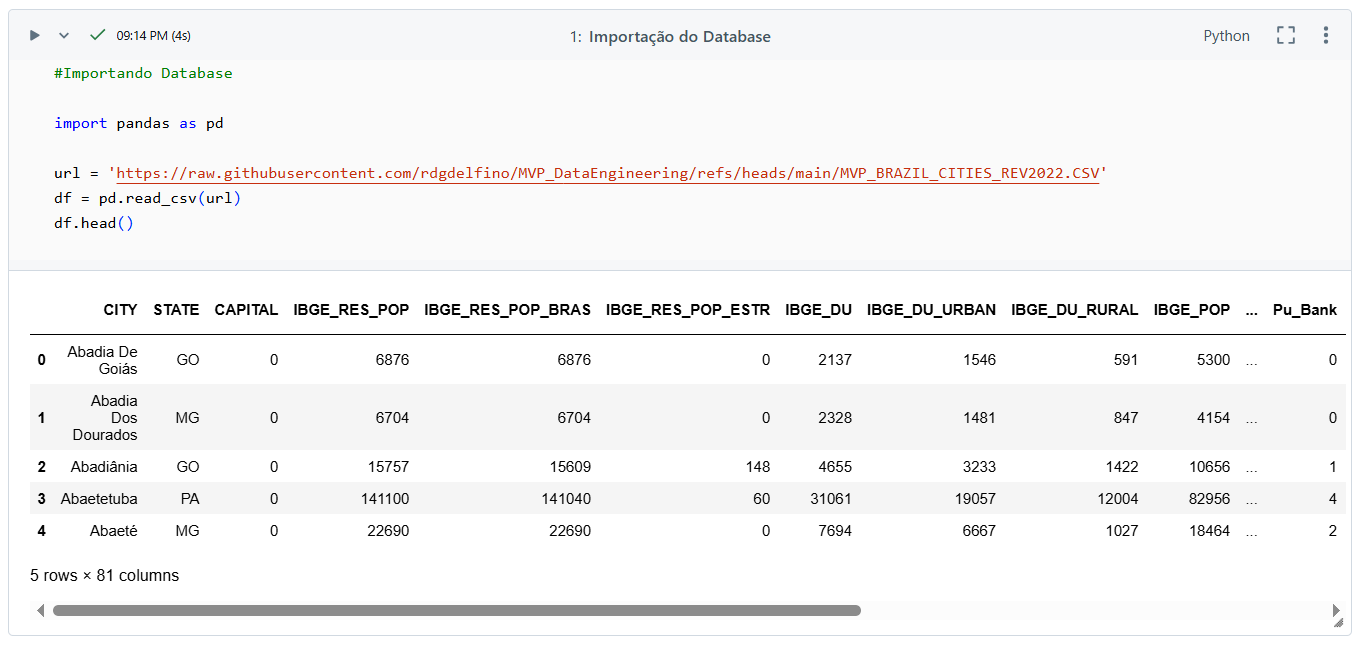

## **3. MODELAGEM**
### **3.1 Tipos de Modelo**

Os dados disponibilizados já foram compilados em uma única tabela, portanto, trabalhar com o **Modelo Flat**, tendo os campos City e State como chaves primárias, se torna uma opção prática e viável para este projeto.

In [1]:
import pandas as pd

#Principais Métricas

url = 'https://raw.githubusercontent.com/rdgdelfino/MVP_DataEngineering/refs/heads/main/MVP_BRAZIL_CITIES_REV2022.CSV'
df = pd.read_csv(url)
df.describe()


,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
count,5578.000000,5.578000e+03,5.578000e+03,5578.000000,5.578000e+03,5.578000e+03,5578.000000,5.578000e+03,5578.000000,5578.000000,...,5578.000000,5.578000e+03,5.578000e+03,5.578000e+03,5.578000e+03,5578.000000,5578.000000,5578.000000,5578.000000,5578.000000
mean,0.005916,3.422313e+04,3.414573e+04,77.404625,1.028313e+04,8.842319e+03,1440.807458,2.755270e+04,382.669236,1542.089100,...,0.947293,5.500436e+09,3.598663e+09,9.839788e+03,4.869557e+03,5.739871,0.022409,0.127465,0.037827,2.035497
std,0.076695,2.028829e+05,2.012627e+05,1793.789719,6.469199e+04,6.428575e+04,1690.483808,1.857468e+05,2324.175869,9242.622881,...,1.069279,2.775752e+11,1.164327e+11,9.175728e+04,2.091673e+04,55.301718,0.148024,2.151446,0.533446,4.378558
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.217000e+03,5.214000e+03,0.000000,1.565250e+03,8.700000e+02,469.250000,2.784250e+03,38.000000,158.000000,...,0.000000,0.000000e+00,0.000000e+00,5.990000e+02,5.880000e+02,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.092650e+04,1.091600e+04,0.000000,3.167000e+03,1.839500e+03,916.000000,6.156000e+03,92.000000,376.000000,...,1.000000,0.000000e+00,2.319925e+07,1.431500e+03,1.280000e+03,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,2.340900e+04,2.338000e+04,10.000000,6.722500e+03,4.618750e+03,1811.750000,1.529875e+04,232.000000,949.750000,...,2.000000,4.774853e+07,1.991191e+08,4.084000e+03,3.292750e+03,1.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.125350e+07,1.113378e+07,119727.000000,3.576148e+06,3.548433e+06,33809.000000,1.046364e+07,129464.000000,514794.000000,...,8.000000,1.947077e+13,8.016164e+12,5.740995e+06,1.134570e+06,3236.000000,1.000000,130.000000,26.000000,225.000000


O catálogo e dicinário de dados deste projeto pode ser conferido na íntegra [aqui](https://github.com/rdgdelfino/MVP_DataEngineering/blob/main/MvP_Catalogo.csv).

In [2]:
# Catálogo

df = pd.read_csv("https://raw.githubusercontent.com/rdgdelfino/MVP_DataEngineering/refs/heads/main/MvP_Catalogo.csv")
df.head()

,CAMPO,DESCRIÇÃO,DOMÍNIO,MIN,MAX,REFERÊNCIA,UNIDADE,FONTE
0,CITY chave,Nome da Cidade,Caracter,-,-,NaN,NaN,-
1,STATE chave,Nome do Estado,Caracter,-,-,NaN,NaN,-
2,CAPITAL,1 se for Capital do Estado,Numérico,0,1,NaN,NaN,-
3,IBGE_RES_POP,População Residente,Numérico,805,11.253.503,2010,-,https://sidra.ibge.gov.br/tabela/1497
4,IBGE_RES_POP_BRAS,População Residente Brasileira,Numérico,805,11.133.776,2010,-,https://sidra.ibge.gov.br/tabela/1497


## **4. ETL**
### **4.1 Pipelines de ETL**
A arquitetura medallion foi escolhida como o formato de ETL, com uma camada Bronze, Silver e Gold. Elas são estruturadas da seguinte forma:

- Bronze: tabela com o conjunto de dados brutos mestre

- Silver: tabela com o conjunto de dados mestre processado (limpo)

- Gold: tabelas que possibilitam uma análise rápida com base nas perguntas que foram propostas.

As tabelas e o notebook utilizado para o ETL podem ser encontrados integralmente no repositório.


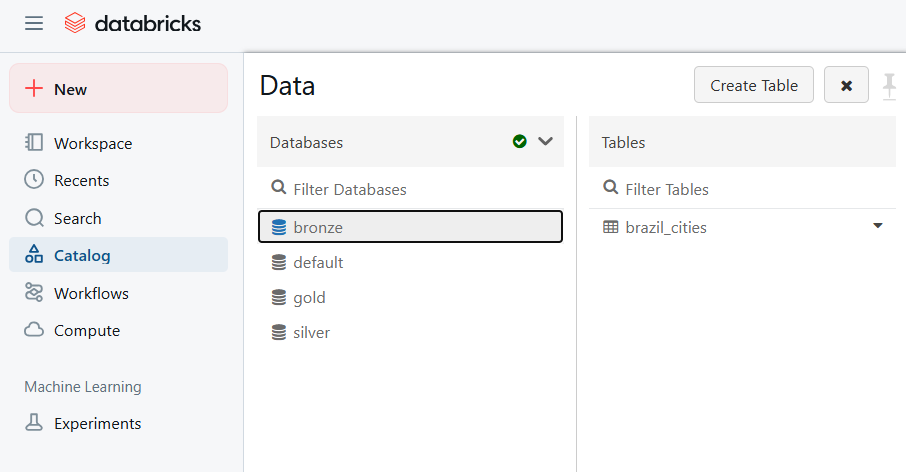

### **4.2 Camada Bronze**

Foi necessário fazer pequenas modificações nos nomes dos atributos do dataframe para viabilizar a criação da tabela com os dados brutos da Camada Bronze.

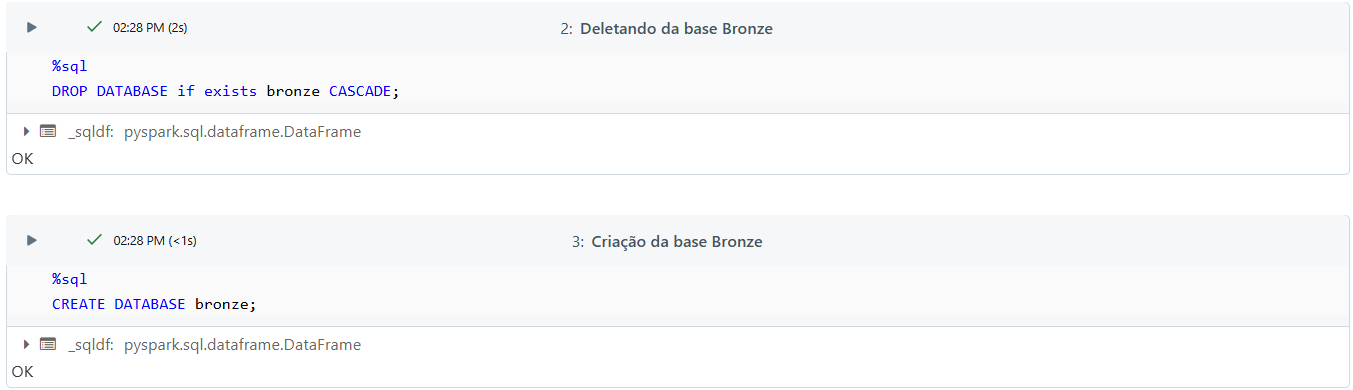

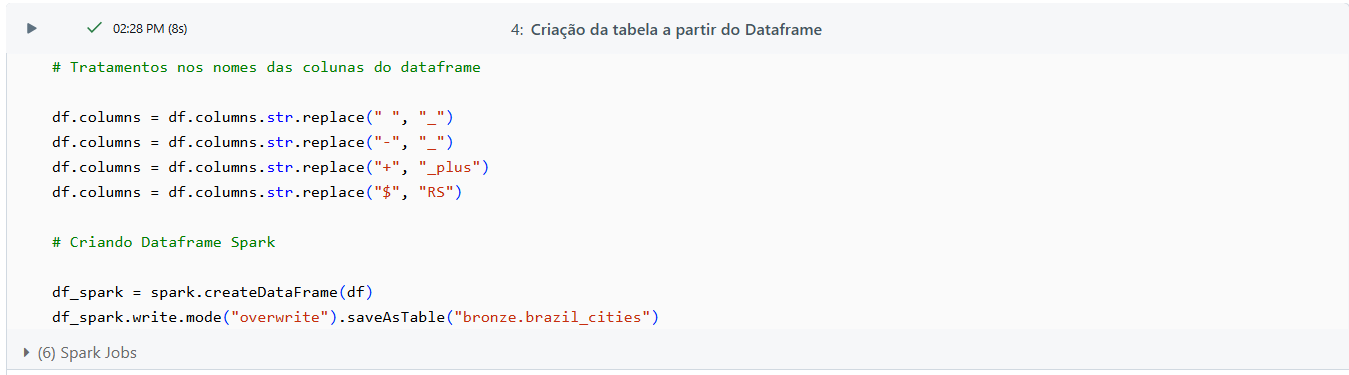

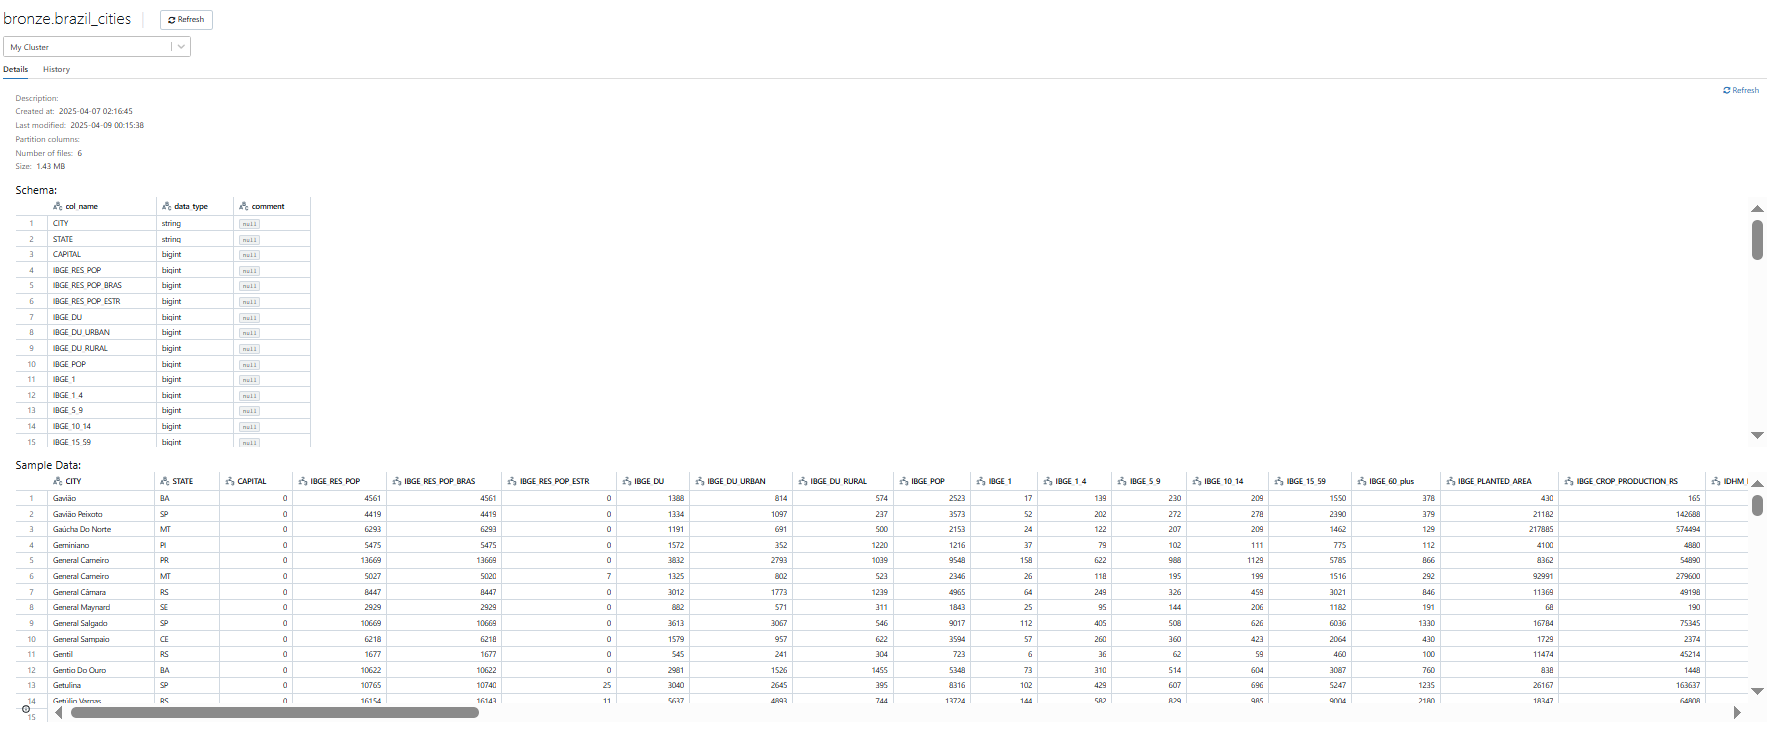

### **4.3 Camada Silver**

Foi feita uma análise dos dados brutos em busca de valores nulos, duplicidade e validação da integridade das principais colunas que serão utilizadas para a análise e resolução do case.



### **4.3.1 Duplicidade**

A partir de uma contagem de linhas por chave, foram encontradas duplicidade de cidades em dois cenários. O primeiro cenário eram linhas realmente duplicidadas e o cenário foi resolvido pela remoção das tuplas extras.

O segundo cenário, é mais complexo, porque apresentava informações divergentes para a cidade de Paraty. Por se tratar de apenas uma cidade, apenas uma coluna divergente e uma pequena difereça de valores, optou-se por adotar o maior deles para o campo de POST OFFICES.

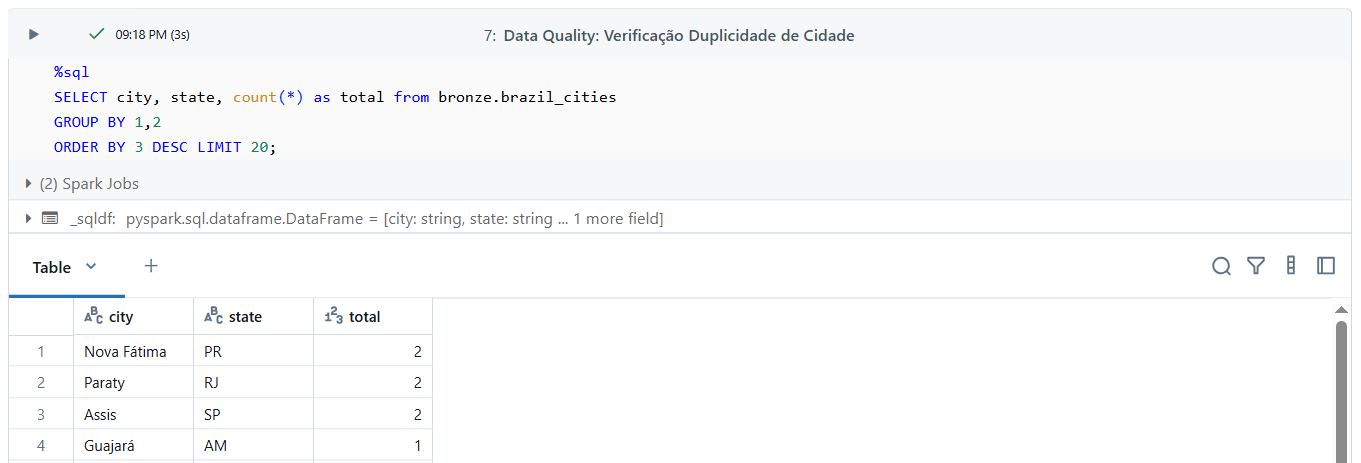

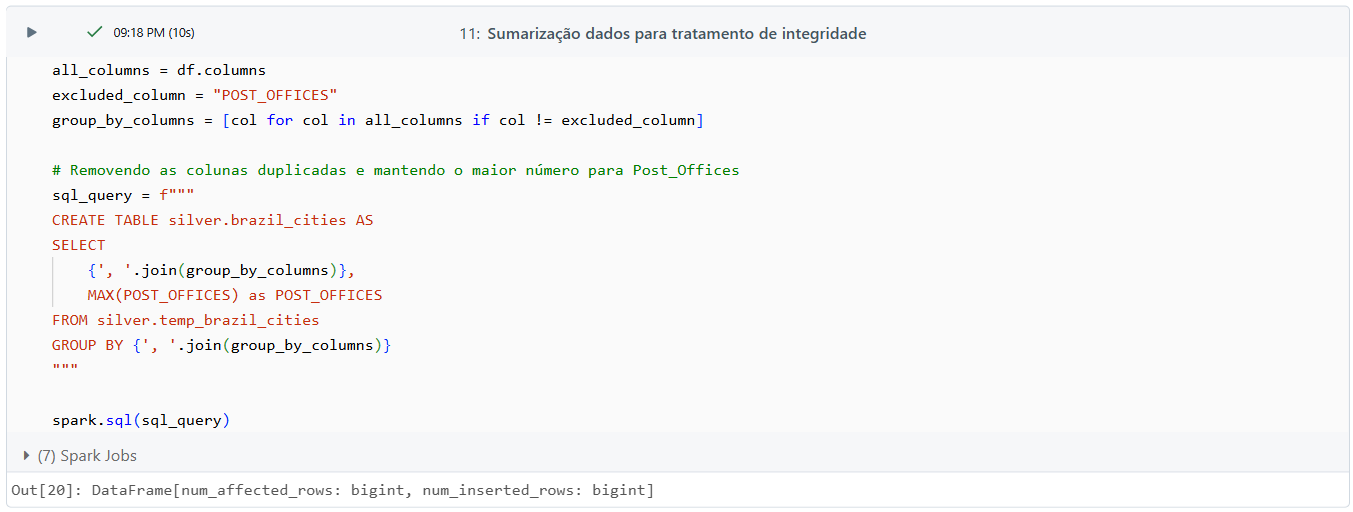

### **4.3.2 Integridade da informação**
Ao verificar a integridade de campos cadastrais importantes para a análise, como GVA_Main, IDHM, GDP(PIB) e IBGE_RES_POP(População), encontrou-se 12 cidades com problema de integridade e valores zerados neste e em outros campos. Decidiu-se pela exclusão destas tuplas da base, pela impossibilidade de encontrar essas informações e por representarem uma amostra muito pequena da base. Atualizar os campos com a moda ou média dos valores poderia resultar em análises futuras análises individuais equivocadas para essas cidades.

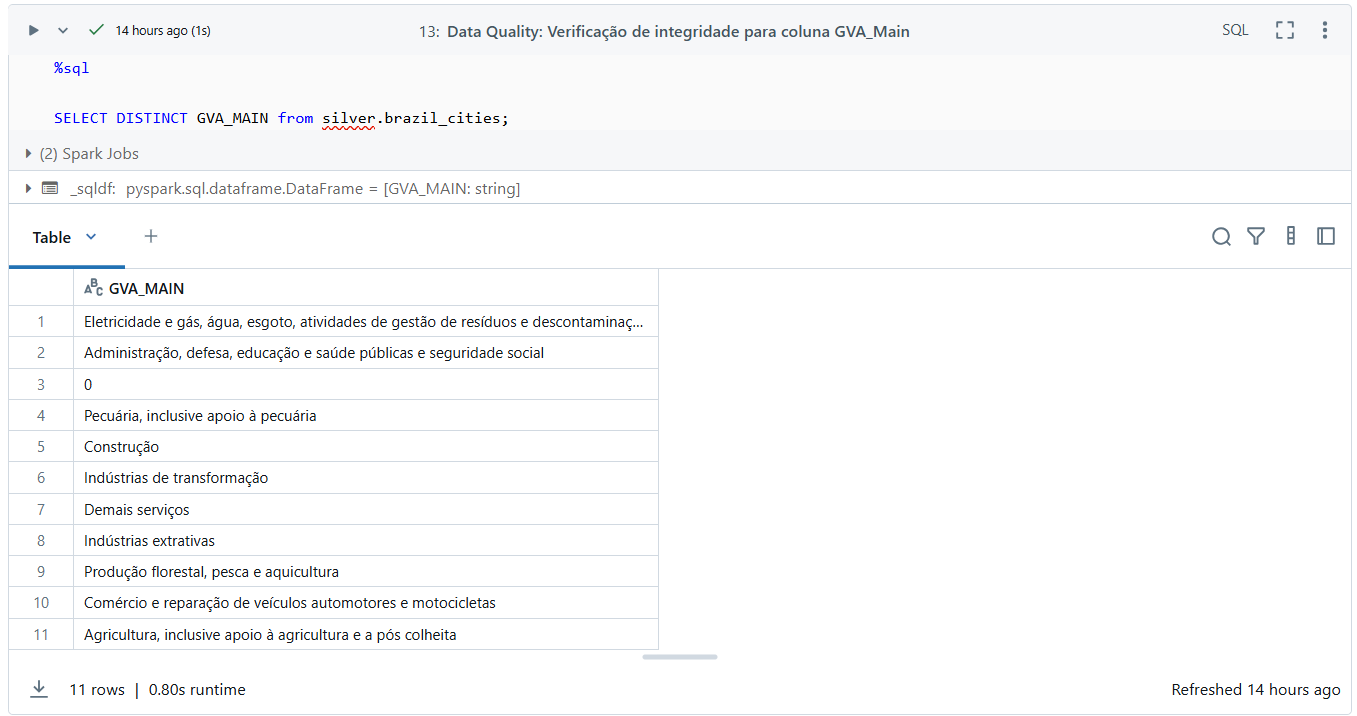


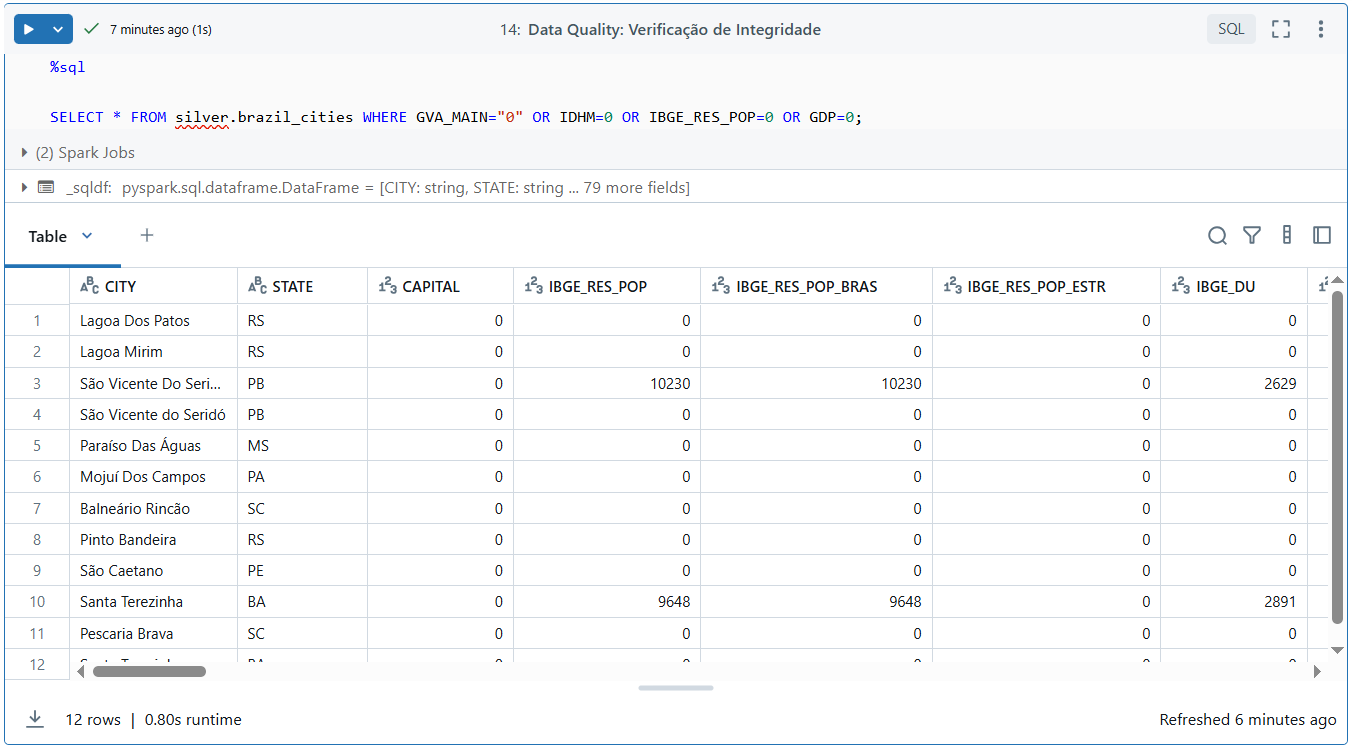

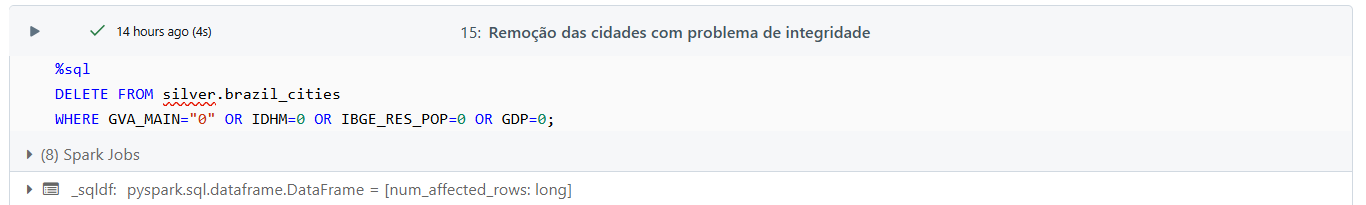

### **4.3.3 Qualidade dos dados**

Validada a qualidade dos dados, foi criada a tabela Silver final.

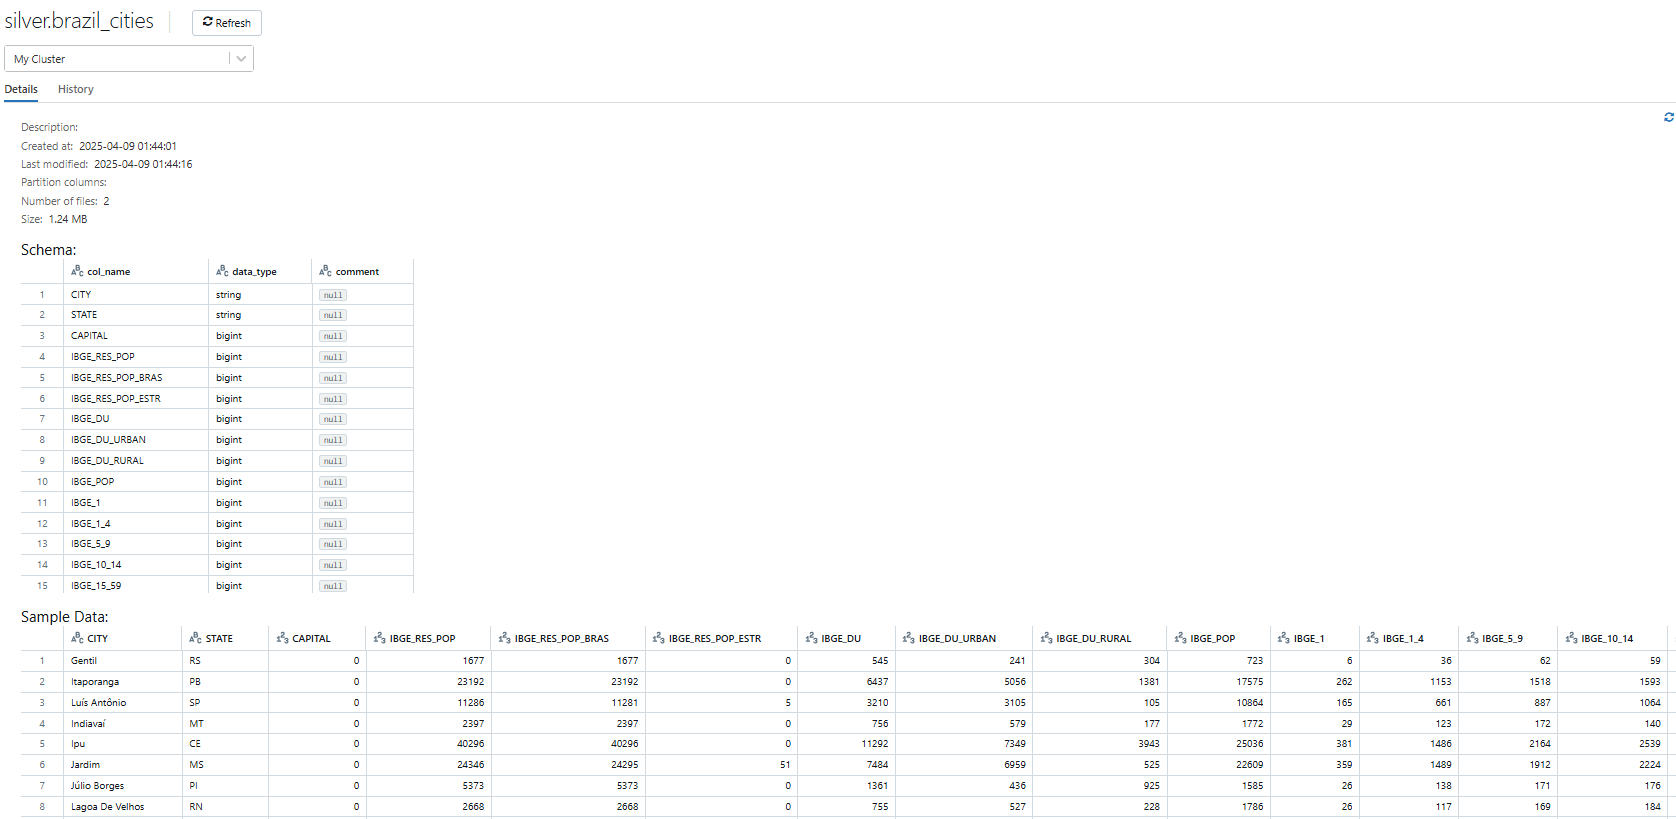

## **5. ANÁLISE**
Com os dados devidamente carregados e tratados, chegou-se a camada Gold da nossa arquitetura. Nela foram criadas algumas novas colunas auxiliares que permitem construir indicadores e esclarer as questões que nortearam este projeto.
- **Region**: Região Geográfica do Estado
- **Faixa_Desenvolvimento**: Classificação do Desenvolvimento conforme valor de IDH

Além disso, criou-se uma tabela auxiliar sumarizada com estados como granularidade chamada Ranking_State_IDH.

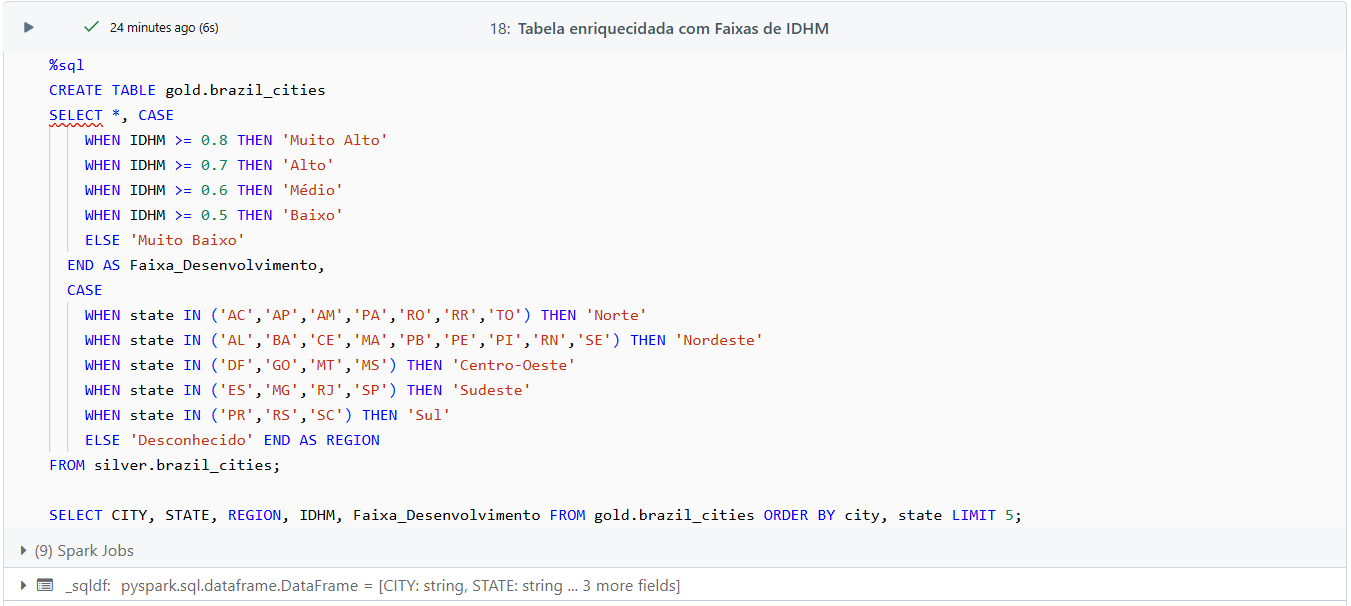

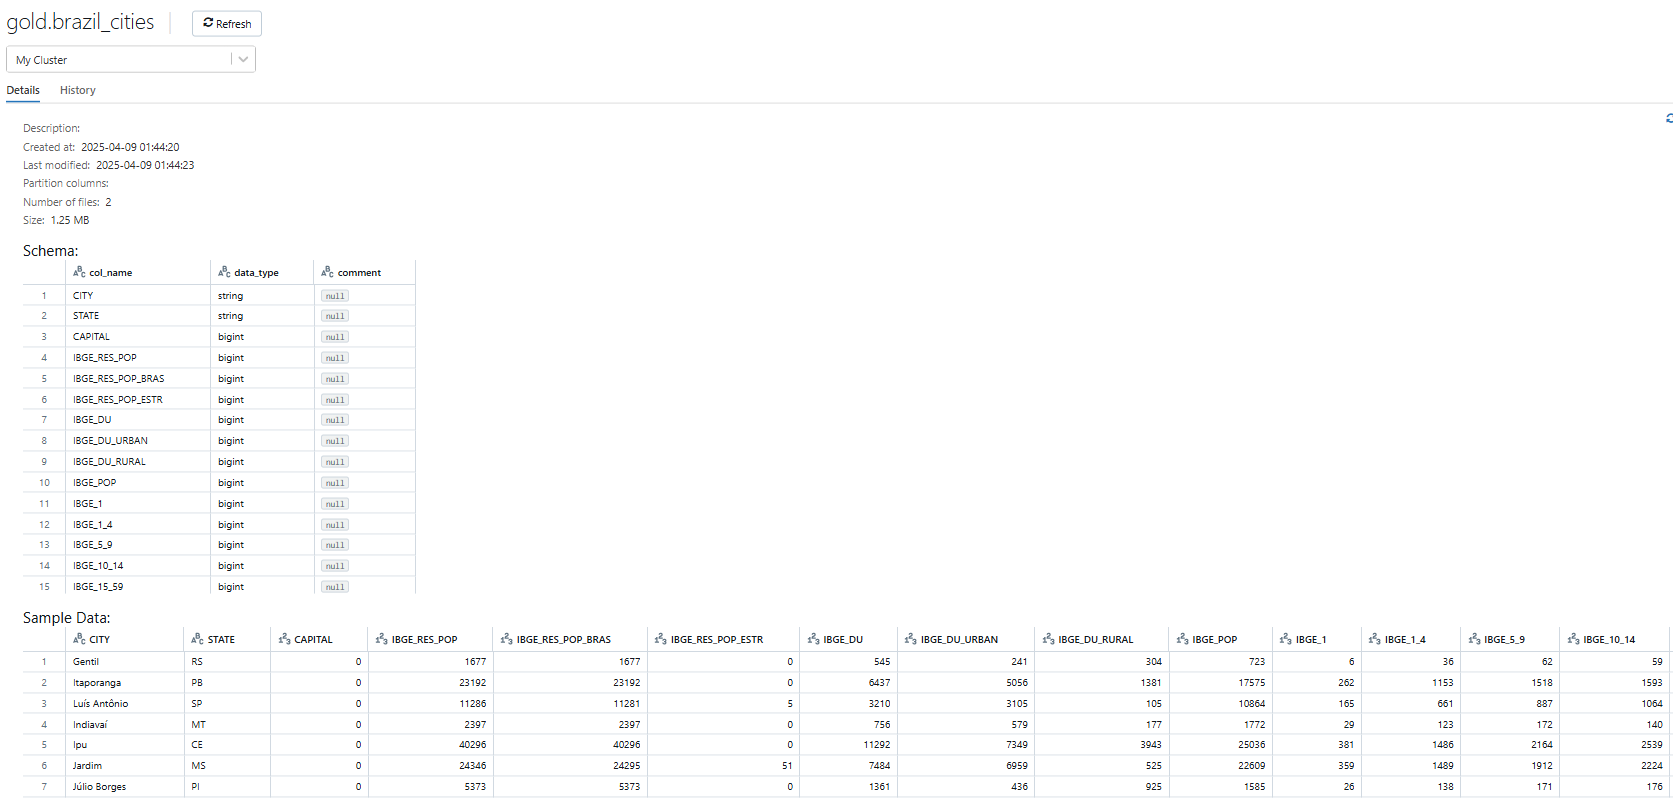


#### **5.1 Quais as cidades com maior IDH do Brasil?**

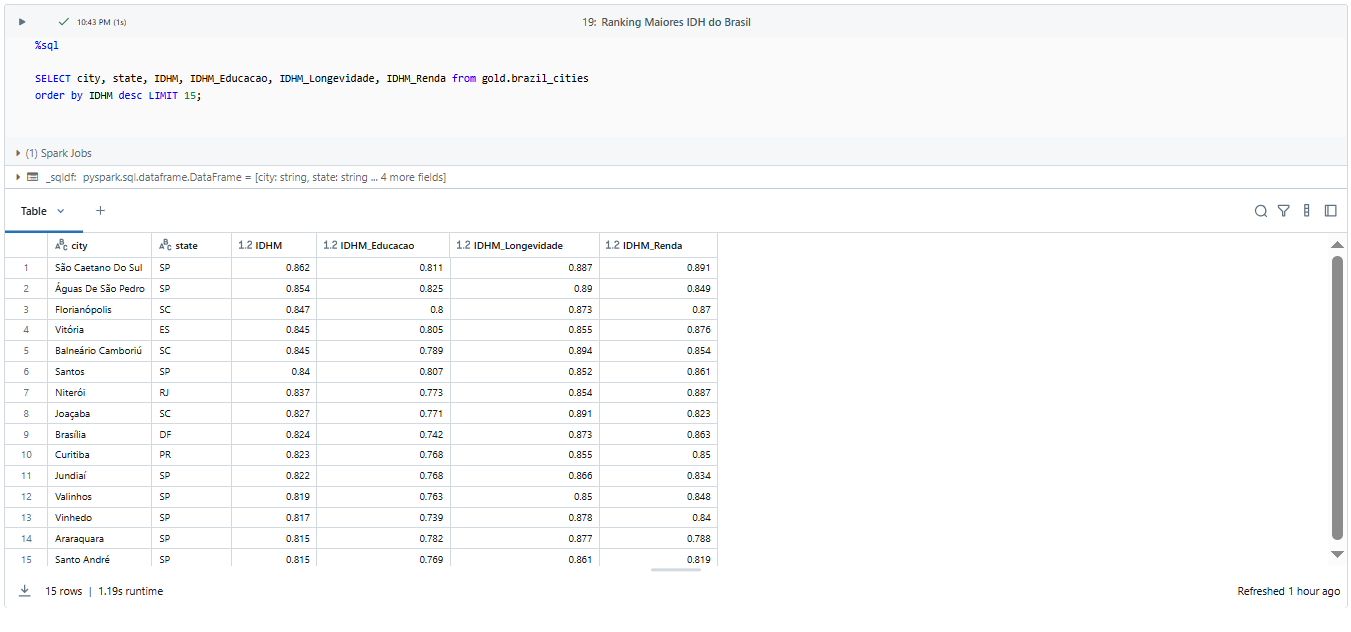

#### **5.2 Quais as estados com maior IDH do Brasil?**

Para a análise dos IDH estaduais, calculou-se a média dos IDHM por Estado e os valores foram classificados por Faixas de IDH para facilitar a leitura dos indicadores.

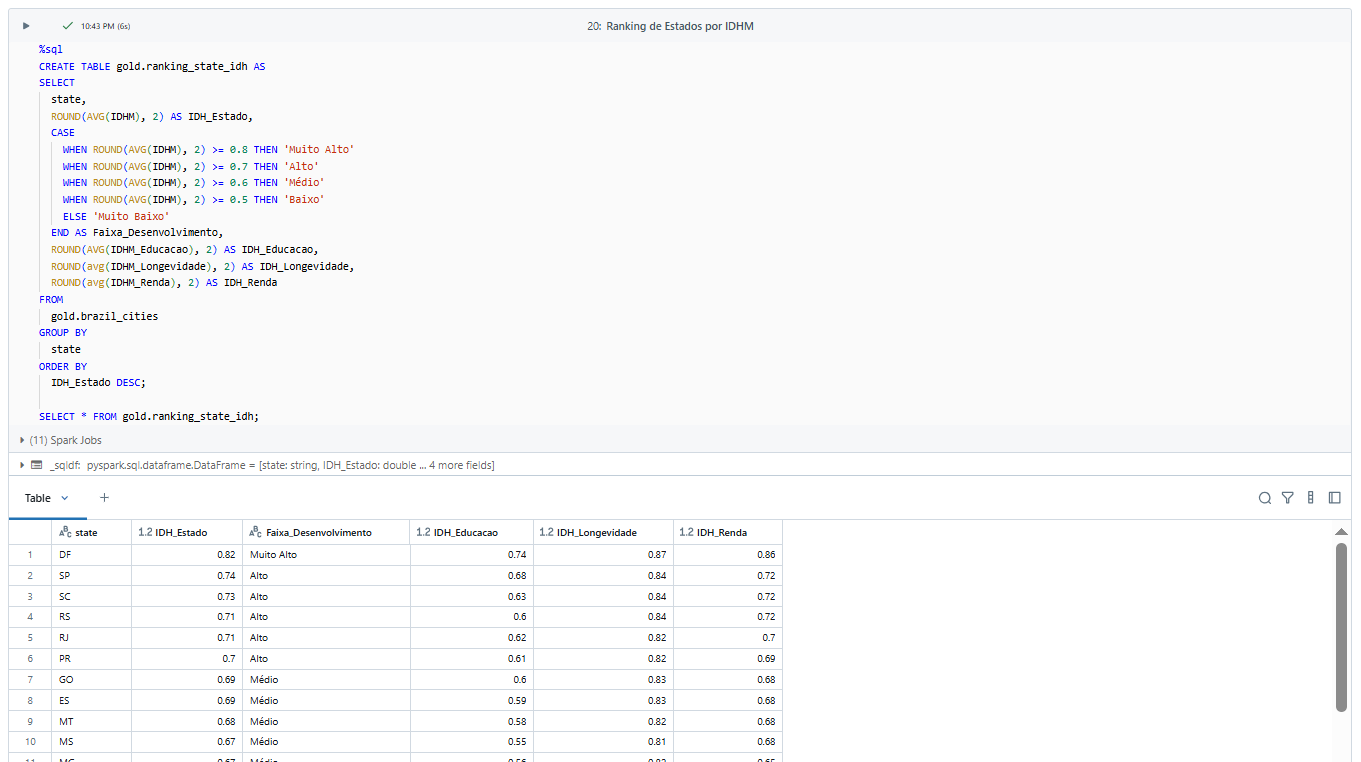

#### **5.3 Qual a região do país possui mais cidades desenvolvidas, relativamente?**

Para análise regional, criou-se uma coluna nova na tabela da camada Gold, classificando cada estado conforme sua região. Como o número de municípios varia conforme a região, foram considerados valores relativos para encontrar qual localidade possuía mais cidades desenvolvidas.

As regiões Norte e Nordeste do país não possuem nenhuma cidade com IDH considerado Muito Alto.

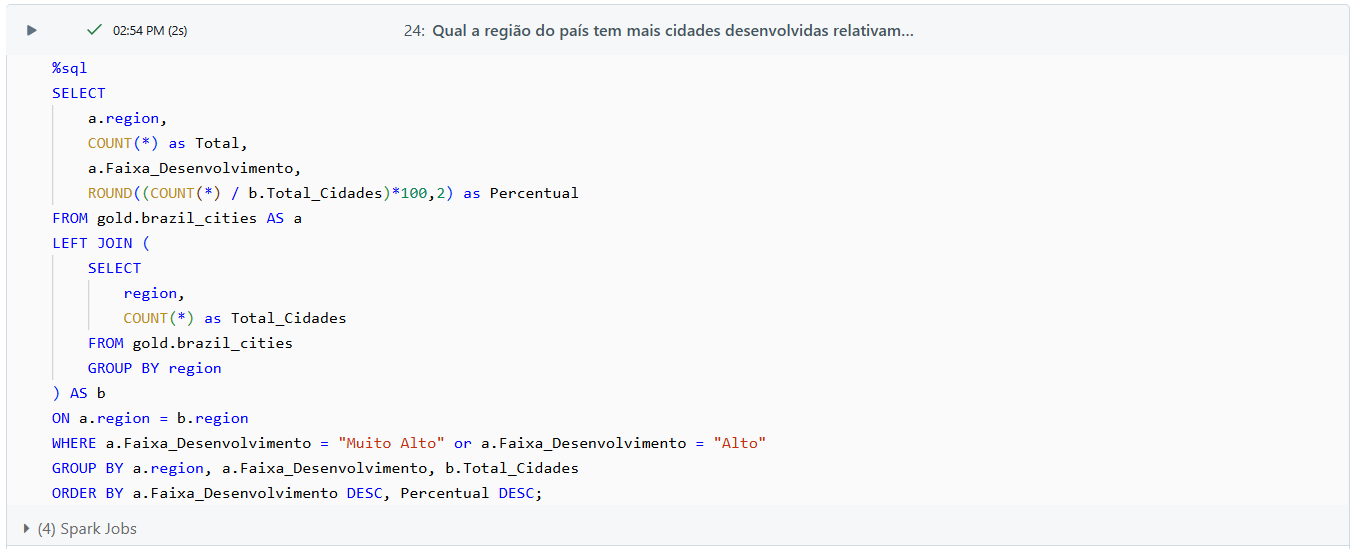
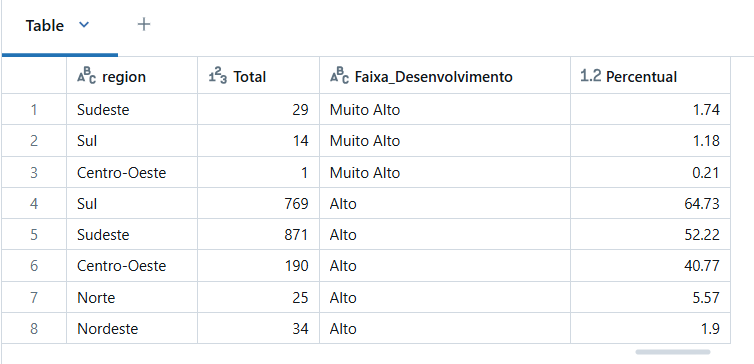

### **5.4 Existe relação entre desenvolvimento social e riqueza econômica?**

Apesar do que se poderia imaginar, não existe correlação entre as IDH(PIB) e PIB(GPD). Ou seja, o desenvolvimento e o riqueza de uma cidade não estão relacionadas diretamente. Muitas cidades com PIB semelhates apresentam níveis muito diferentes de desenvolvimento.

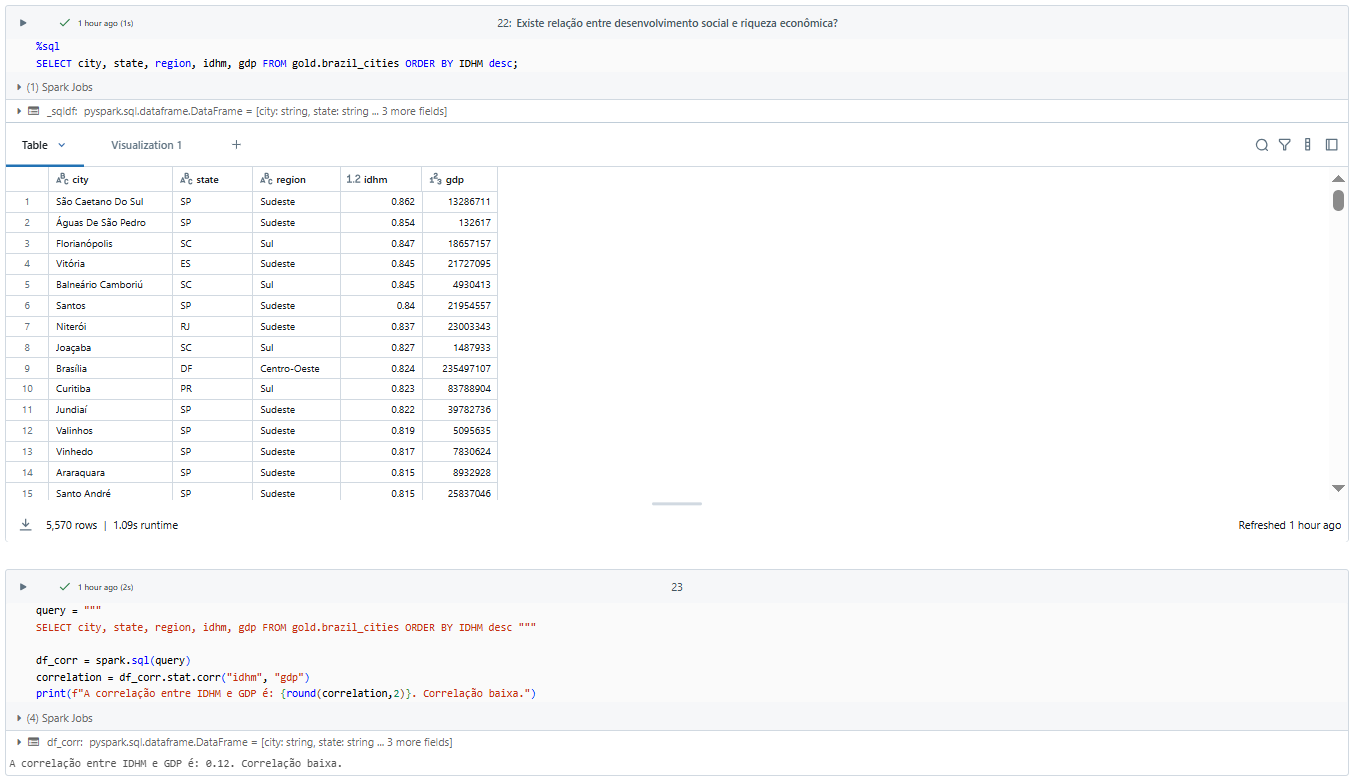

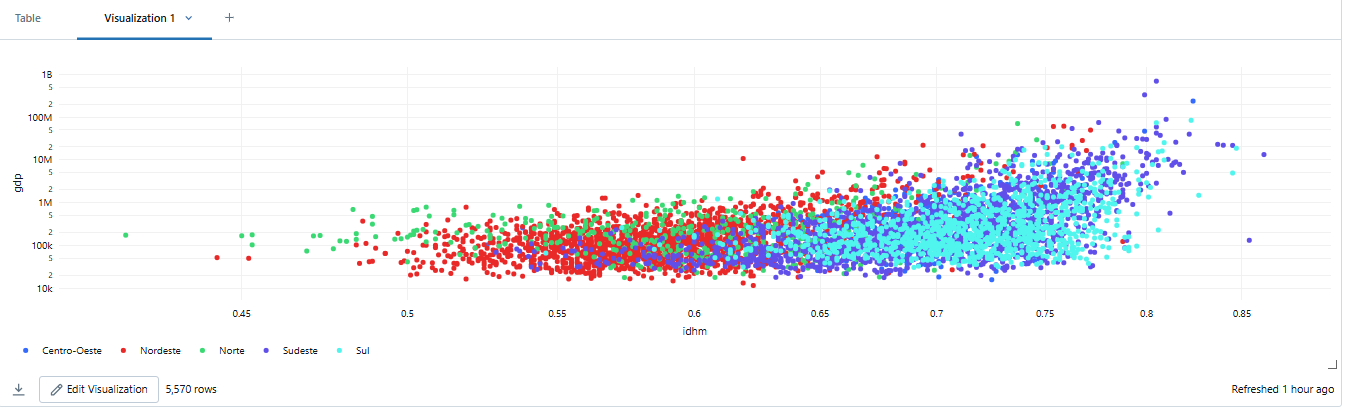

### **5.5 Quais os principais setores economômicos das cidades mais ricas? E das mais pobres?**

Entre as 100 cidades mais ricas do país, o principal setor econômico que mais movimenta economia são atividades variadas de serviço, aparecendo em 80 cidades. Por outro lado, todas as 100 cidades mais pobres do país possui as atividades ligadas ao Estado e serviços públicos como principal atividade econômica.

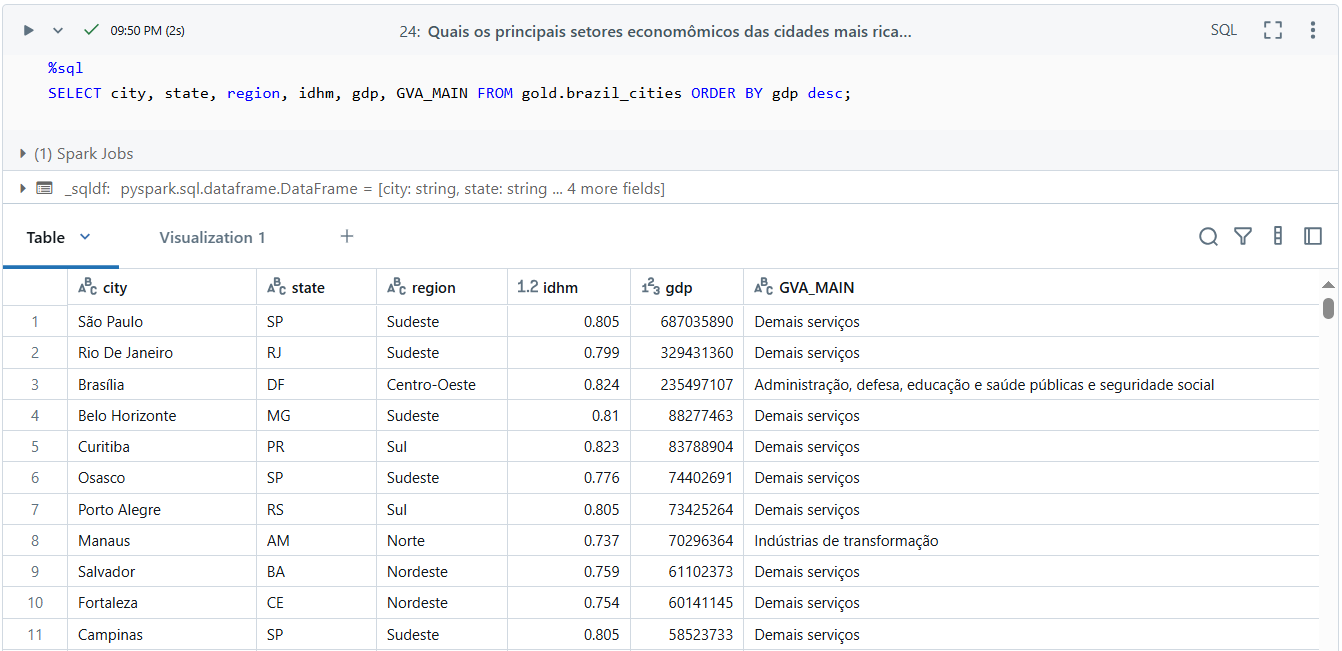

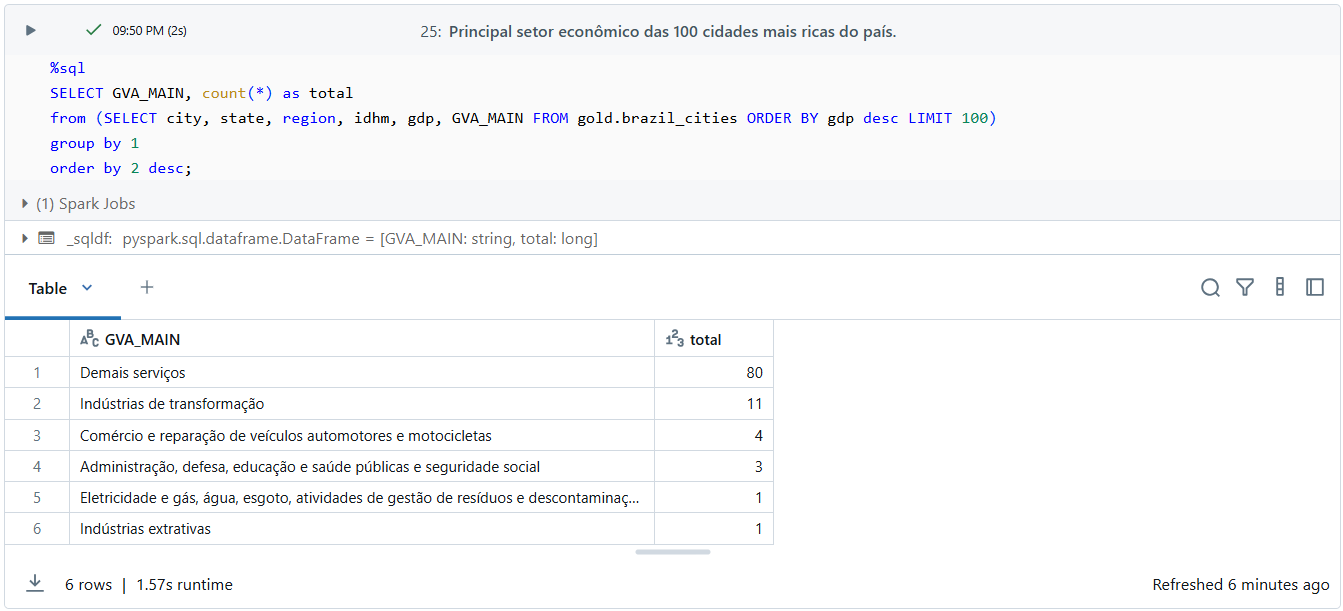
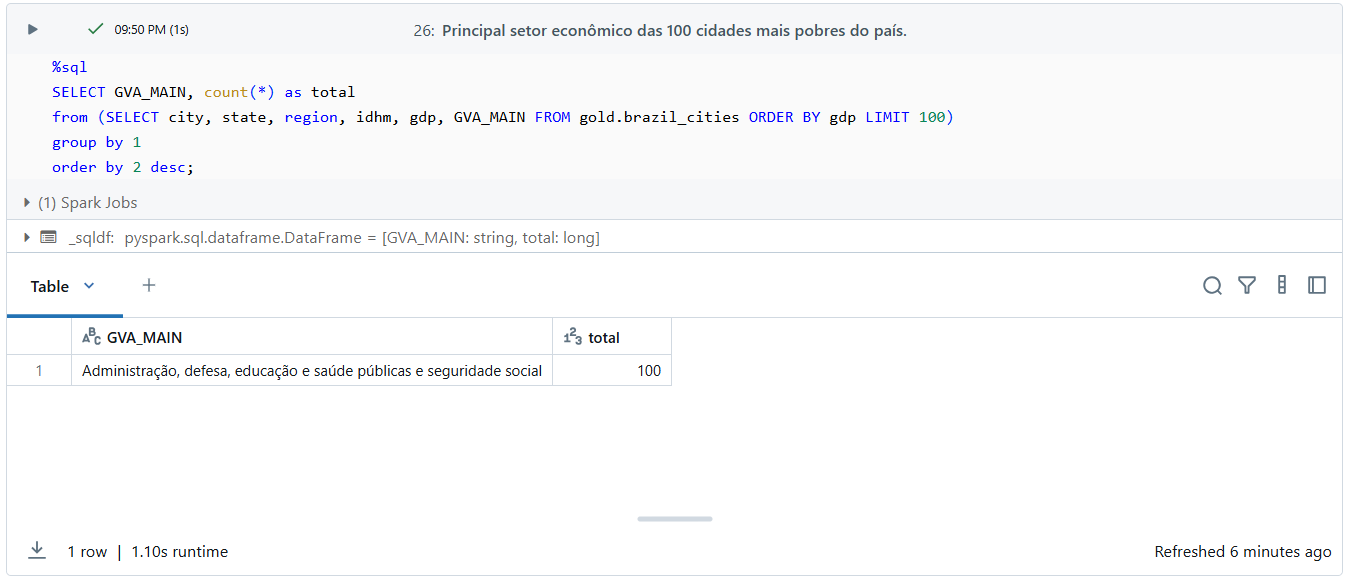

### **5.6 O nível de urbanização está ligado ao nível de desenvolvimento social/econômico?**

Outro aspecto que foi verificado é se o nível de urbanização é um fator relevante para a riqueza e desenvolvimento econômico. Para isso, criou-se uma nova variável para classificar o nível de urbanização dos municípios avaliados, através proporção entre entre número total domicílios e do número de domicílios em área urbana. Apesar de não haver correlação entre o PIB e a Taxa de Urbanização, verificou-se que as cidades mais ricas do país podem ser consideradas como muito urbanizadas, além de apresentarem IDH Alto ou Muito Alto.

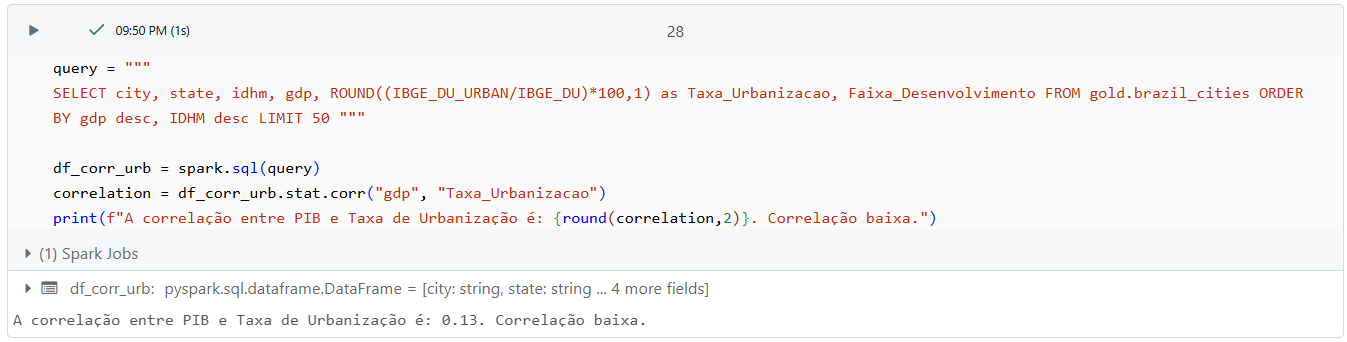

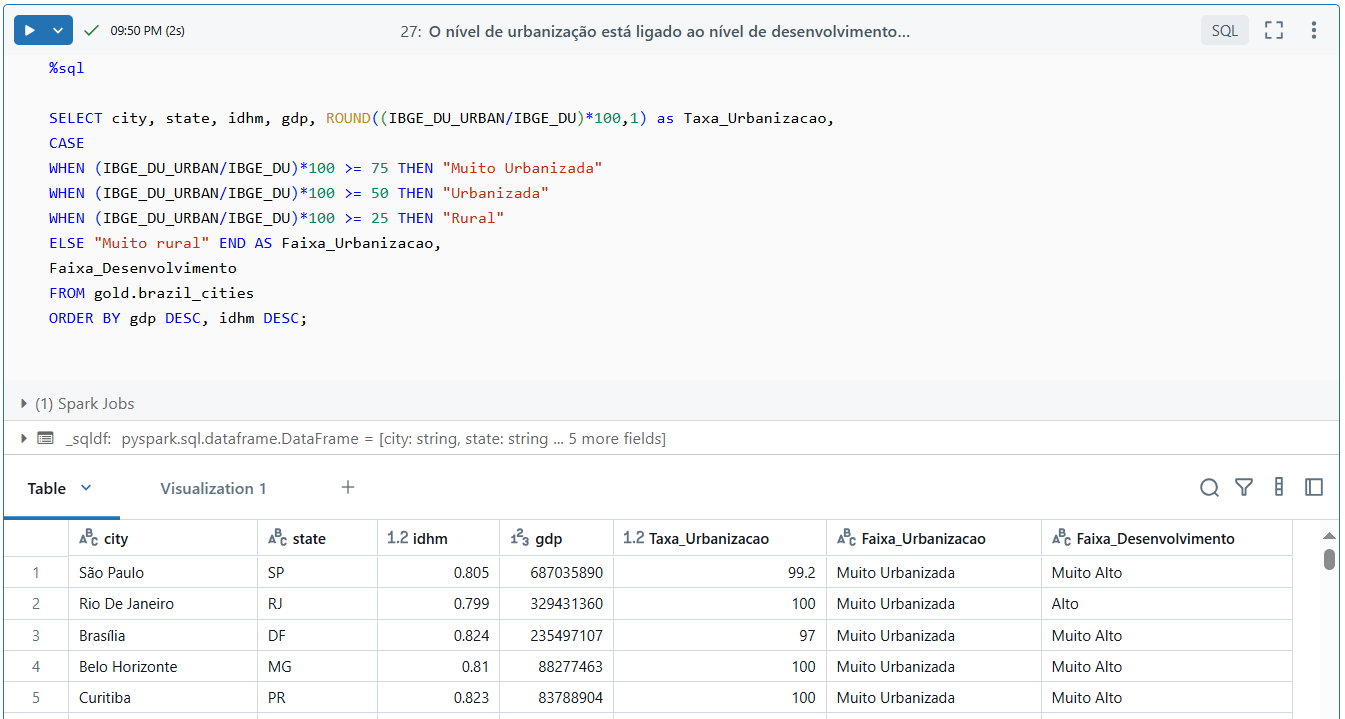
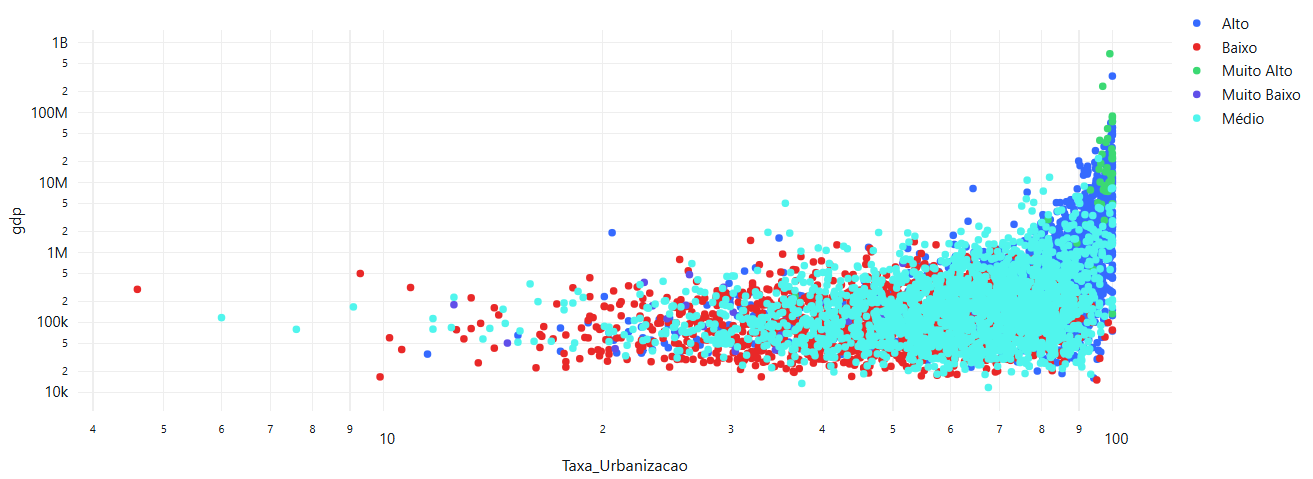


## **6. Conclusão**

Apesar de hipóteses iniciais, não é possível correlacionar os indicadores econômicos, sociais e de urbanização para entender a dinâmica das cidades brasileiras. Mesmo que os extremos dos rankings socioeconômicos apresentem características de semelhantes, o ambiente urbano brasileiro é diverso e apenas essas lentes se tornam insuficientes para entender sua complexidade.

As ferramentas de visualização de dados oferecidas pelo Databricks auxiliam no entedimento do panorama geral dos dados e funcionam de forma complementar às tabelas. Algumas das questões levantadas para este projeto puderam ser respondidas de forma satisfatória, outras, mais complexas, como a busca de correlação entre um ou mais atributos poderiam ser melhor trabalhadas  se combinadas à técnicas utilizadas em Machine Learning como PCA e Feature Selection.
